In [29]:
from neqr_preparation_record_toffoli_v2 import neqr_info,qstate2circuit_by_record_toffoli
from qiskit import QuantumCircuit, QuantumRegister,ClassicalRegister
from qiskit import execute, BasicAer
from numpy import binary_repr
from quantum_img_operation import add_comparator
from time import time
from qiskit import IBMQ
from qiskit.tools.monitor import job_monitor

In [30]:
# IBMQ.enable_account('f36ee70cf2ac474adb2005ccd48f0334019d4b78c0390e7f699938dd20398139582231fd01573b4f69b162e711353c453979831799e374db64acc60c1e301b42')
# IBMQ.save_account('f36ee70cf2ac474adb2005ccd48f0334019d4b78c0390e7f699938dd20398139582231fd01573b4f69b162e711353c453979831799e374db64acc60c1e301b42', overwrite=True)

In [31]:
# start=time()
# start

In [32]:
files = ['in-2.png']
shot_times=16
color_n = 8
state_length, all_quantum_states = neqr_info(color_n, files, 'preparation')
assist_n = 2
reg_counts = state_length + assist_n
    
qr = QuantumRegister(reg_counts, 'qr')
circuit = QuantumCircuit(qr)
for i in range(color_n, state_length):
    circuit.h(qr[i])

for target_state in all_quantum_states[0]:
    qstate2circuit_by_record_toffoli(circuit, qr, color_n, target_state,
                                     state_length, reg_counts)

In [33]:
# all_quantum_states[0] # neqr表达式，没有经过量子线路的运行

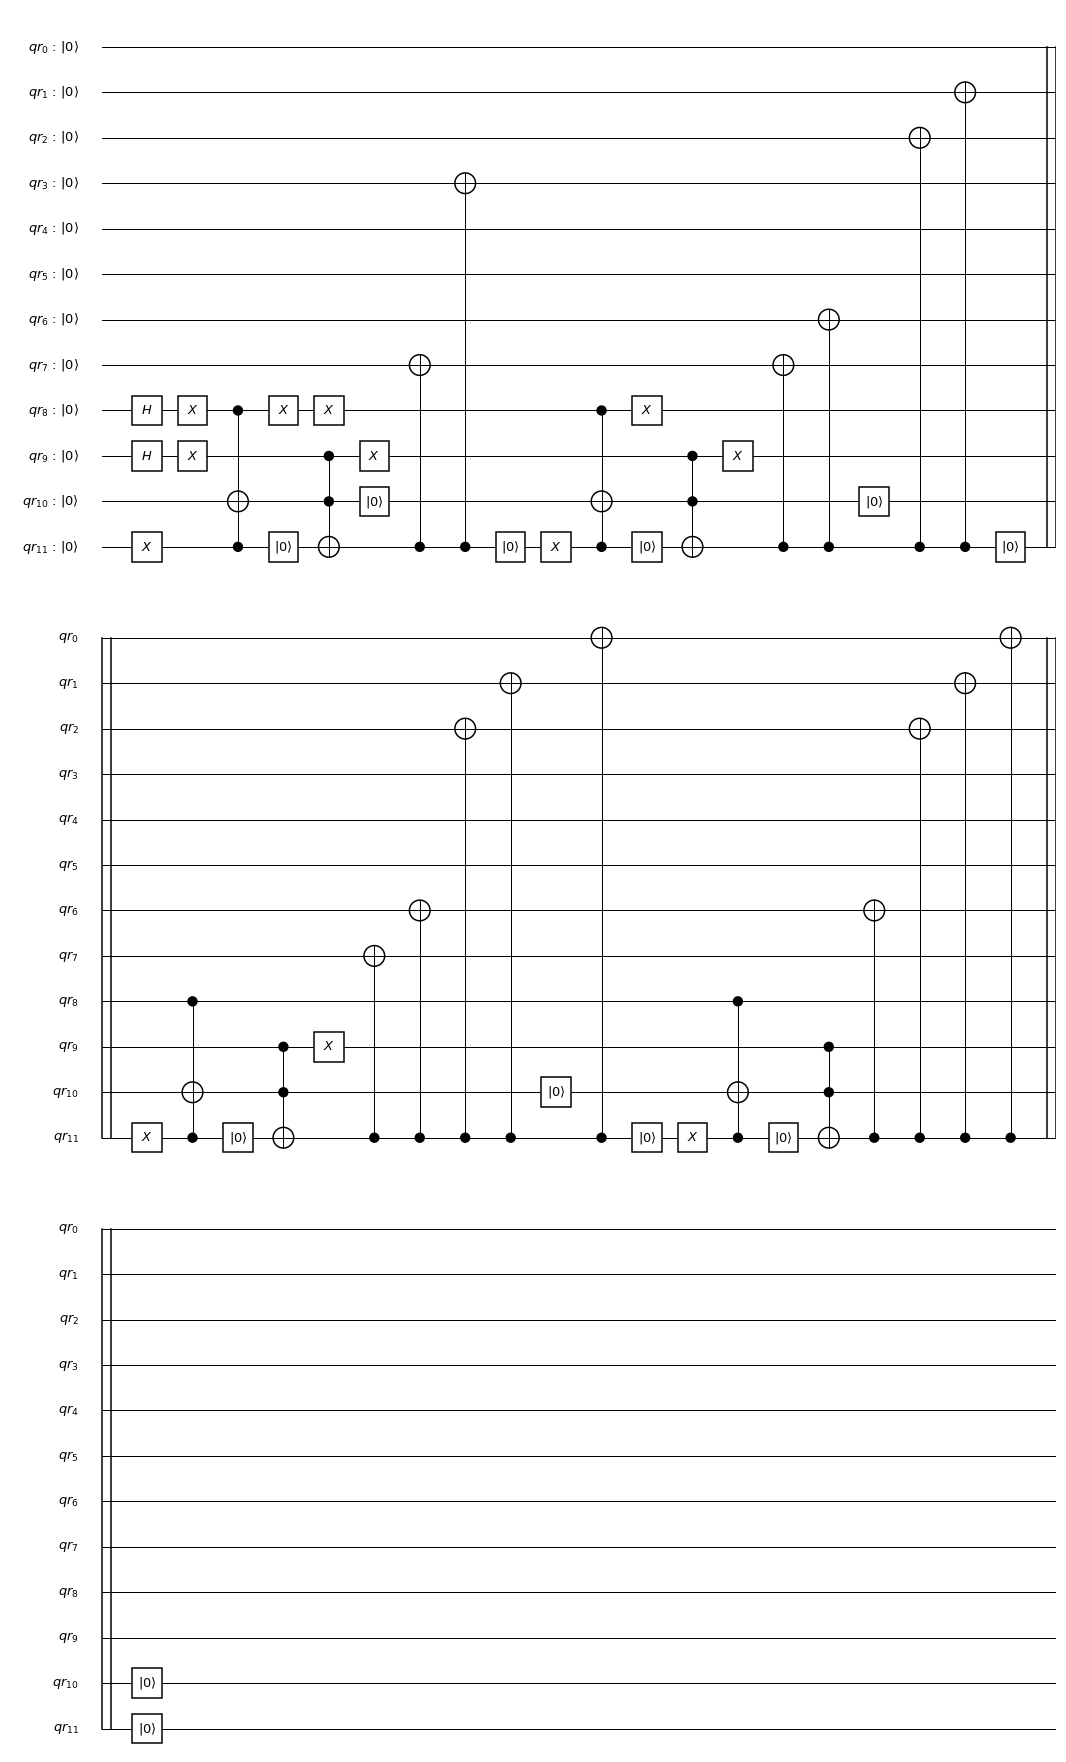

In [34]:
circuit.draw(output='mpl')

In [35]:
state_length

10

In [36]:
len(all_quantum_states[0])

4

In [37]:
cr=ClassicalRegister(reg_counts,'cr')
circuit.add_register(cr)
circuit.measure(qr,cr)

In [38]:
# 云端
max_credits=3
IBMQ.load_accounts()
backend=IBMQ.get_backend('ibmq_qasm_simulator')
start=time()
start
job_exp = execute(circuit, backend, shots=shot_times, max_credits=max_credits)
job_monitor(job_exp)
end=time()
print(end-start)
result=job_exp.result()
end=time()
print(end-start)
counts = result.get_counts(circuit)


# 本地
# backend=BasicAer.get_backend('qasm_simulator')
# start=time()
# start
# result=execute(circuit,backend,shots=shot_times).result()
# end=time()
# end-start



counts=result.get_counts(circuit)
all_lst=list(counts.keys())
all_lst #这是经过量子线路运算之后的输出字符串，这个字符串当中包含图像的位置信息和灰度信息

/usr/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqprovider.py:251: UserWarning: Credentials are already in use.
  warnings.warn('Credentials are already in use.')


HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

8.906675100326538
10.11931586265564


['000010001000', '000111000111', '001101000111', '001011000110']

In [39]:
len(all_lst)

4

In [40]:
from matplotlib import pyplot

In [41]:
# from qiskit.tools.visualization import plot_histogram
# plot_histogram(counts,(20,15),bar_labels=False)

In [42]:
for i in all_lst:
    if i[-state_length:][::-1] in all_quantum_states[0]:
        print(i+'---->'+i[-state_length:][::-1])

000010001000---->0001000100
000111000111---->1110001110
001101000111---->1110001011
001011000110---->0110001101


In [43]:
res=[]
for i in all_lst:
    res.append(i[-state_length:][::-1])
res

['0001000100', '1110001110', '1110001011', '0110001101']

In [44]:
sorted(res)==sorted(all_quantum_states[0])

True

In [45]:
print(str((end-start)/60)+' min')

0.16865526437759398 min
